In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('salary_data.csv')  # <- Add your dataset here
data.head()


,Experience,EducationLevel,Salary
0,1,Bachelor,40000
1,2,Bachelor,45000
2,3,Master,60000
3,4,PhD,80000
4,5,Master,75000


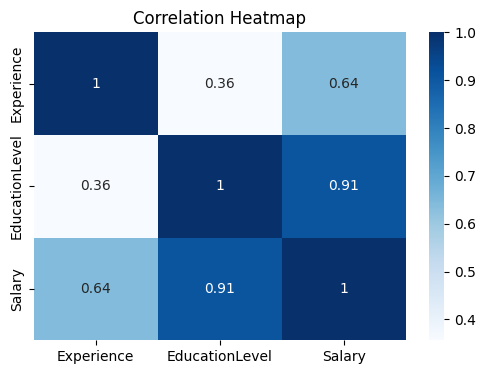

In [4]:
# Encode categorical column temporarily for correlation
corr_data = data.copy()
corr_data['EducationLevel'] = corr_data['EducationLevel'].map({'Bachelor': 0, 'Master': 1, 'PhD': 2})

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_data.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()



In [5]:
# Encoding categorical feature
data['EducationLevel'] = data['EducationLevel'].map({'Bachelor': 0, 'Master': 1, 'PhD': 2})

X = data[['Experience', 'EducationLevel']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [6]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 5755.641330166269
RMSE: 7069.432230569525
R² Score: -0.9990748825046087


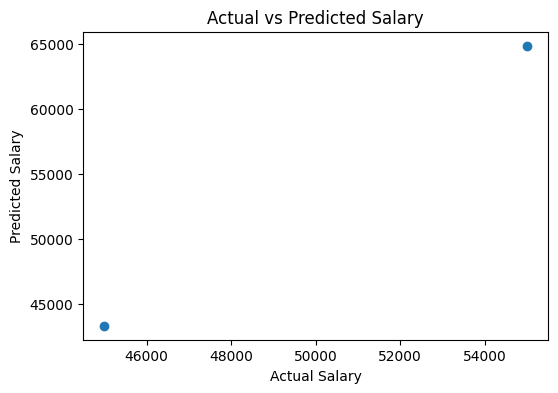

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


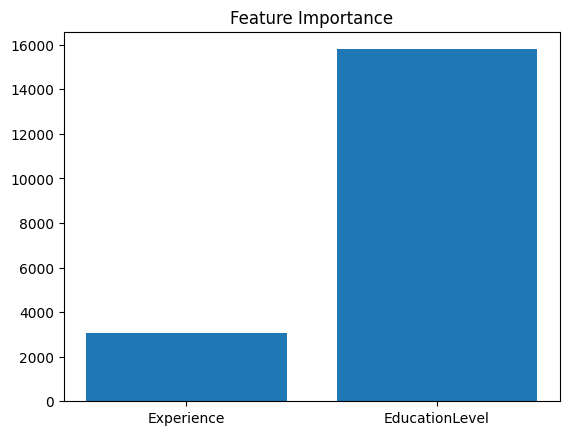

In [8]:
features = X.columns
importance = model.coef_

plt.bar(features, importance)
plt.title("Feature Importance")
plt.show()
